In [2]:
# -*- coding:utf-8 -*-
# !/usr/bin/env python
"""
Date: 2023/1/28 10:20
Desc: 东方财富-股票-财务分析
"""
import pandas as pd
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

from functools import lru_cache


@lru_cache()
def _stock_balance_sheet_by_report_ctype_em(symbol: str = "SH600519") -> str:
    """
    东方财富-股票-财务分析-资产负债表-按报告期-公司类型判断
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh601878#zcfzb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 东方财富-股票-财务分析-资产负债表-按报告期-公司类型判断
    :rtype: str
    """
    url = f"https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index"
    params = {"type": "web", "code": symbol.lower()}
    r = requests.get(url, params=params)
    soup = BeautifulSoup(r.text, "lxml")
    company_type = soup.find(attrs={"id": "hidctype"})["value"]
    return company_type


def stock_balance_sheet_by_report_em(symbol: str = "SH600519") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-资产负债表-按报告期
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 资产负债表-按报告期
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "0",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_balance_sheet_by_yearly_em(symbol: str = "SH600036") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-资产负债表-按年度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 资产负债表-按年度
    :rtype: pandas.DataFrame
    """
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbDateAjaxNew"
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol)
    params = {
        "companyType": company_type,
        "reportDateType": "1",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    try:
        temp_df = pd.DataFrame(data_json["data"])
    except:
        company_type = 3
        params.update({"companyType": company_type})
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "1",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_profit_sheet_by_report_em(symbol: str = "SH600519") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-利润表-报告期
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 利润表-报告期
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "0",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "1",
            "code": symbol,
            "dates": item,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_profit_sheet_by_yearly_em(symbol: str = "SH600519") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-利润表-按年度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 利润表-按年度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "1",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "1",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_profit_sheet_by_quarterly_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-利润表-按单季度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 利润表-按单季度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "2",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "2",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_cash_flow_sheet_by_report_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-现金流量表-按报告期
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 现金流量表-按报告期
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "0",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_cash_flow_sheet_by_yearly_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-现金流量表-按年度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 现金流量表-按年度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "1",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "1",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_cash_flow_sheet_by_quarterly_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-现金流量表-按单季度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 现金流量表-按单季度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "2",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "2",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df




In [4]:

def stock_financial_analysis_indicator(symbol: str = "600004") -> pd.DataFrame:
    """
    新浪财经-财务分析-财务指标
    https://money.finance.sina.com.cn/corp/go.php/vFD_FinancialGuideLine/stockid/600004/ctrl/2019/displaytype/4.phtml
    :param symbol: 股票代码
    :type symbol: str
    :return: 新浪财经-财务分析-财务指标
    :rtype: pandas.DataFrame
    """
    url = f"https://money.finance.sina.com.cn/corp/go.php/vFD_FinancialGuideLine/stockid/{symbol}/ctrl/2020/displaytype/4.phtml"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    year_context = soup.find(attrs={"id": "con02-1"}).find("table").find_all("a")
    year_list = [item.text for item in year_context]
    out_df = pd.DataFrame()
    for year_item in tqdm(year_list, leave=False):
        url = f"https://money.finance.sina.com.cn/corp/go.php/vFD_FinancialGuideLine/stockid/{symbol}/ctrl/{year_item}/displaytype/4.phtml"
        r = requests.get(url)
        temp_df = pd.read_html(r.text)[12].iloc[:, :-1]
        temp_df.columns = temp_df.iloc[0, :]
        temp_df = temp_df.iloc[1:, :]
        big_df = pd.DataFrame()
        indicator_list = ["每股指标", "盈利能力", "成长能力", "营运能力", "偿债及资本结构", "现金流量", "其他指标"]
        for i in range(len(indicator_list)):
            if i == 6:
                inner_df = temp_df[
                    temp_df.loc[
                        temp_df.iloc[:, 0].str.find(indicator_list[i]) == 0, :
                    ].index[0] :
                ].T
            else:
                inner_df = temp_df[
                    temp_df.loc[temp_df.iloc[:, 0].str.find(indicator_list[i]) == 0, :]
                    .index[0] : temp_df.loc[
                        temp_df.iloc[:, 0].str.find(indicator_list[i + 1]) == 0, :
                    ]
                    .index[0]
                    - 1
                ].T
            inner_df = inner_df.reset_index(drop=True)
            big_df = pd.concat([big_df, inner_df], axis=1)
        big_df.columns = big_df.iloc[0, :].tolist()
        big_df = big_df.iloc[1:, :]
        big_df.index = temp_df.columns.tolist()[1:]
        out_df = pd.concat([out_df, big_df])

    out_df.dropna(inplace=True)
    out_df.reset_index(inplace=True)
    out_df.rename(columns={"index": "日期"}, inplace=True)
    return out_df


In [137]:
stock_code = "SZ002475"
balance_sheet = stock_balance_sheet_by_yearly_em(stock_code)
profit_sheet = stock_profit_sheet_by_yearly_em(stock_code)
cash_flow_sheet = stock_cash_flow_sheet_by_yearly_em(stock_code)

# 转换数据单位为亿元
profit_sheet[['TOTAL_OPERATE_INCOME','PARENT_NETPROFIT','FINANCE_EXPENSE', 'SALE_EXPENSE', 'MANAGE_EXPENSE', 'RESEARCH_EXPENSE','OPERATE_COST']] /= 1e8

In [138]:
for i in balance_sheet.columns:
    print(i)

SECUCODE
SECURITY_CODE
SECURITY_NAME_ABBR
ORG_CODE
ORG_TYPE
REPORT_DATE
REPORT_TYPE
REPORT_DATE_NAME
SECURITY_TYPE_CODE
NOTICE_DATE
UPDATE_DATE
CURRENCY
ACCEPT_DEPOSIT_INTERBANK
ACCOUNTS_PAYABLE
ACCOUNTS_RECE
ACCRUED_EXPENSE
ADVANCE_RECEIVABLES
AGENT_TRADE_SECURITY
AGENT_UNDERWRITE_SECURITY
AMORTIZE_COST_FINASSET
AMORTIZE_COST_FINLIAB
AMORTIZE_COST_NCFINASSET
AMORTIZE_COST_NCFINLIAB
APPOINT_FVTPL_FINASSET
APPOINT_FVTPL_FINLIAB
ASSET_BALANCE
ASSET_OTHER
ASSIGN_CASH_DIVIDEND
AVAILABLE_SALE_FINASSET
BOND_PAYABLE
BORROW_FUND
BUY_RESALE_FINASSET
CAPITAL_RESERVE
CIP
CONSUMPTIVE_BIOLOGICAL_ASSET
CONTRACT_ASSET
CONTRACT_LIAB
CONVERT_DIFF
CREDITOR_INVEST
CURRENT_ASSET_BALANCE
CURRENT_ASSET_OTHER
CURRENT_LIAB_BALANCE
CURRENT_LIAB_OTHER
DEFER_INCOME
DEFER_INCOME_1YEAR
DEFER_TAX_ASSET
DEFER_TAX_LIAB
DERIVE_FINASSET
DERIVE_FINLIAB
DEVELOP_EXPENSE
DIV_HOLDSALE_ASSET
DIV_HOLDSALE_LIAB
DIVIDEND_PAYABLE
DIVIDEND_RECE
EQUITY_BALANCE
EQUITY_OTHER
EXPORT_REFUND_RECE
FEE_COMMISSION_PAYABLE
FIN_FUND
FINANCE

In [139]:
for i in cash_flow_sheet.columns:
    print(i)

SECUCODE
SECURITY_CODE
SECURITY_NAME_ABBR
ORG_CODE
ORG_TYPE
REPORT_DATE
REPORT_TYPE
REPORT_DATE_NAME
SECURITY_TYPE_CODE
NOTICE_DATE
UPDATE_DATE
CURRENCY
SALES_SERVICES
DEPOSIT_INTERBANK_ADD
LOAN_PBC_ADD
OFI_BF_ADD
RECEIVE_ORIGIC_PREMIUM
RECEIVE_REINSURE_NET
INSURED_INVEST_ADD
DISPOSAL_TFA_ADD
RECEIVE_INTEREST_COMMISSION
BORROW_FUND_ADD
LOAN_ADVANCE_REDUCE
REPO_BUSINESS_ADD
RECEIVE_TAX_REFUND
RECEIVE_OTHER_OPERATE
OPERATE_INFLOW_OTHER
OPERATE_INFLOW_BALANCE
TOTAL_OPERATE_INFLOW
BUY_SERVICES
LOAN_ADVANCE_ADD
PBC_INTERBANK_ADD
PAY_ORIGIC_COMPENSATE
PAY_INTEREST_COMMISSION
PAY_POLICY_BONUS
PAY_STAFF_CASH
PAY_ALL_TAX
PAY_OTHER_OPERATE
OPERATE_OUTFLOW_OTHER
OPERATE_OUTFLOW_BALANCE
TOTAL_OPERATE_OUTFLOW
OPERATE_NETCASH_OTHER
OPERATE_NETCASH_BALANCE
NETCASH_OPERATE
WITHDRAW_INVEST
RECEIVE_INVEST_INCOME
DISPOSAL_LONG_ASSET
DISPOSAL_SUBSIDIARY_OTHER
REDUCE_PLEDGE_TIMEDEPOSITS
RECEIVE_OTHER_INVEST
INVEST_INFLOW_OTHER
INVEST_INFLOW_BALANCE
TOTAL_INVEST_INFLOW
CONSTRUCT_LONG_ASSET
INVEST_PAY_CASH
P

In [140]:
for i in profit_sheet.columns:
    print(i)

SECUCODE
SECURITY_CODE
SECURITY_NAME_ABBR
ORG_CODE
ORG_TYPE
REPORT_DATE
REPORT_TYPE
REPORT_DATE_NAME
SECURITY_TYPE_CODE
NOTICE_DATE
UPDATE_DATE
CURRENCY
TOTAL_OPERATE_INCOME
TOTAL_OPERATE_INCOME_YOY
OPERATE_INCOME
OPERATE_INCOME_YOY
INTEREST_INCOME
INTEREST_INCOME_YOY
EARNED_PREMIUM
EARNED_PREMIUM_YOY
FEE_COMMISSION_INCOME
FEE_COMMISSION_INCOME_YOY
OTHER_BUSINESS_INCOME
OTHER_BUSINESS_INCOME_YOY
TOI_OTHER
TOI_OTHER_YOY
TOTAL_OPERATE_COST
TOTAL_OPERATE_COST_YOY
OPERATE_COST
OPERATE_COST_YOY
INTEREST_EXPENSE
INTEREST_EXPENSE_YOY
FEE_COMMISSION_EXPENSE
FEE_COMMISSION_EXPENSE_YOY
RESEARCH_EXPENSE
RESEARCH_EXPENSE_YOY
SURRENDER_VALUE
SURRENDER_VALUE_YOY
NET_COMPENSATE_EXPENSE
NET_COMPENSATE_EXPENSE_YOY
NET_CONTRACT_RESERVE
NET_CONTRACT_RESERVE_YOY
POLICY_BONUS_EXPENSE
POLICY_BONUS_EXPENSE_YOY
REINSURE_EXPENSE
REINSURE_EXPENSE_YOY
OTHER_BUSINESS_COST
OTHER_BUSINESS_COST_YOY
OPERATE_TAX_ADD
OPERATE_TAX_ADD_YOY
SALE_EXPENSE
SALE_EXPENSE_YOY
MANAGE_EXPENSE
MANAGE_EXPENSE_YOY
ME_RESEARCH_EXPENSE

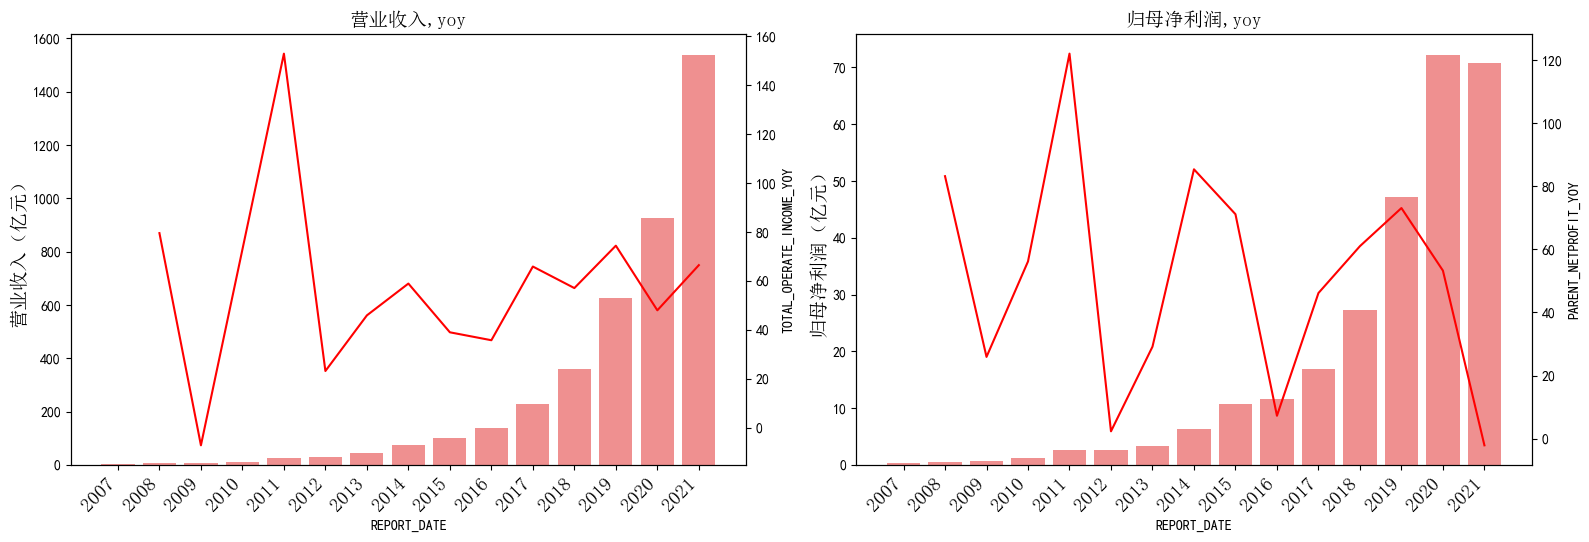

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

color1 = (255/255, 0/255, 0/255)
color2 = (4/255, 78/255, 126/255)
color3 = (255/255, 128/255, 128/255)
color4 = (180/255, 202/255, 216/255)
# 设置中文显示
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)

# 只保留 REPORT_DATE 的年份信息
profit_sheet['REPORT_DATE'] = profit_sheet['REPORT_DATE'].str[:4]

# 分组计算每年的营业收入和归属母公司净利润及其同比增长率
df = profit_sheet.groupby('REPORT_DATE').agg(
    {'TOTAL_OPERATE_INCOME': 'sum',
     'PARENT_NETPROFIT': 'sum',
     'TOTAL_OPERATE_INCOME_YOY': 'mean',
     'PARENT_NETPROFIT_YOY': 'mean'}
).reset_index()

# 设置画布
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 营业收入和YOY
sns.barplot(data=df, x='REPORT_DATE', y='TOTAL_OPERATE_INCOME', color=color3, ax=axes[0])
axes[0].set_ylabel('营业收入（亿元）', color='black', fontproperties=font)
axes[0].tick_params(axis='y', labelcolor='black')
axes[0].set_xticklabels(df['REPORT_DATE'].unique(), rotation=45, ha='right', fontproperties=font)
sns.lineplot(data=df, x='REPORT_DATE', y='TOTAL_OPERATE_INCOME_YOY', color=color1, ax=axes[0].twinx())
axes[0].set_title('营业收入,yoy', fontproperties=font)

# 归母净利润和YOY
sns.barplot(data=df, x='REPORT_DATE', y='PARENT_NETPROFIT', color=color3, ax=axes[1])
axes[1].set_ylabel('归母净利润（亿元）', color='black', fontproperties=font)
axes[1].tick_params(axis='y', labelcolor='black')
axes[1].set_xticklabels(df['REPORT_DATE'].unique(), rotation=45, ha='right', fontproperties=font)
sns.lineplot(data=df, x='REPORT_DATE', y='PARENT_NETPROFIT_YOY', color=color1, ax=axes[1].twinx())
axes[1].set_title('归母净利润,yoy', fontproperties=font)

# 设置整体标题
#fig.suptitle('归母净利润和营业收入变化趋势', fontproperties=font, fontsize=16)

# 调整图例位置
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 显示图形
plt.show()



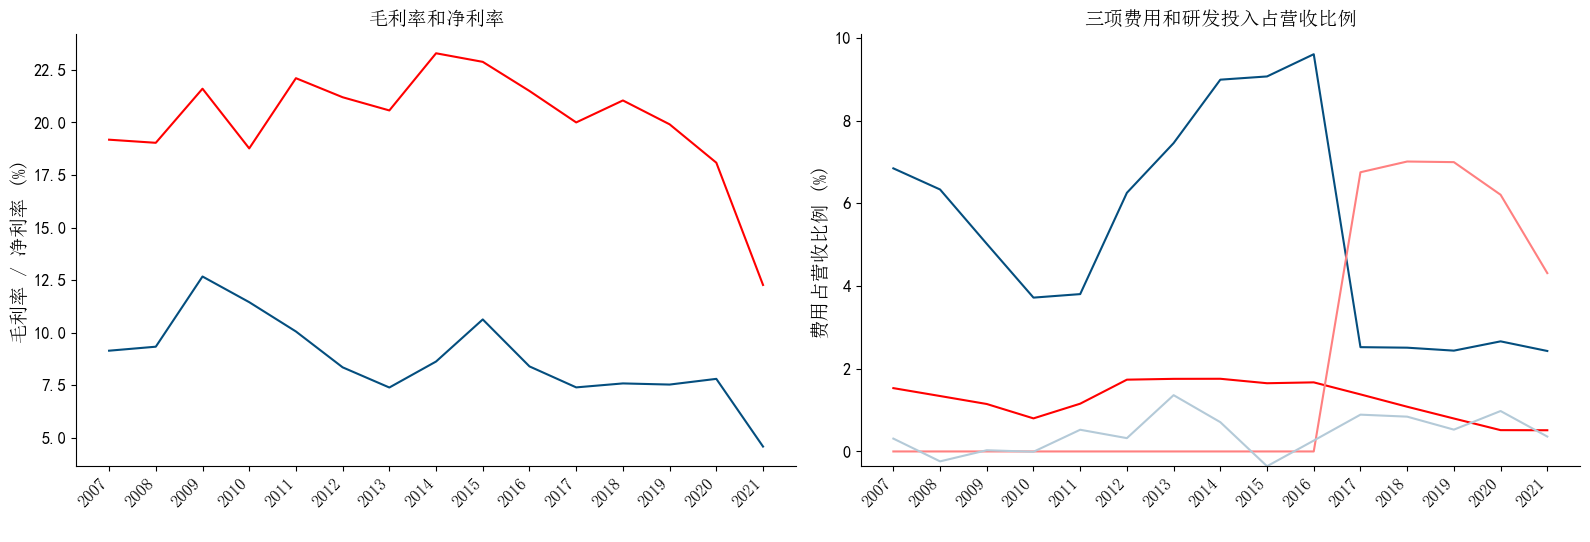

In [214]:
# 计算毛利率和净利率
profit_sheet['GROSS_PROFIT_RATE'] = (profit_sheet['TOTAL_OPERATE_INCOME'] - profit_sheet['OPERATE_COST']) / profit_sheet['TOTAL_OPERATE_INCOME'] * 100
profit_sheet['NET_PROFIT_RATE'] = profit_sheet['PARENT_NETPROFIT'] / profit_sheet['TOTAL_OPERATE_INCOME'] * 100

# 分组计算每年的毛利率和净利率
df1 = profit_sheet.groupby('REPORT_DATE').agg(
    {'GROSS_PROFIT_RATE': 'mean',
     'NET_PROFIT_RATE': 'mean'}
).reset_index()

# 计算三项费用及研发投入占营业收入的比例
df2 = profit_sheet.groupby('REPORT_DATE').agg(
    {'TOTAL_OPERATE_INCOME': 'sum',
     'SALE_EXPENSE': 'sum',
     'MANAGE_EXPENSE': 'sum',
     'FINANCE_EXPENSE': 'sum',
     'RESEARCH_EXPENSE': 'sum'}
).reset_index()

df2['SALE_EXPENSE_RATIO'] = df2['SALE_EXPENSE'] / df2['TOTAL_OPERATE_INCOME'] * 100
df2['MANAGE_EXPENSE_RATIO'] = df2['MANAGE_EXPENSE'] / df2['TOTAL_OPERATE_INCOME'] * 100
df2['FINANCE_EXPENSE_RATIO'] = df2['FINANCE_EXPENSE'] / df2['TOTAL_OPERATE_INCOME'] * 100
df2['RESEARCH_EXPENSE_RATIO'] = df2['RESEARCH_EXPENSE'] / df2['TOTAL_OPERATE_INCOME'] * 100

# 合并两个df
df = pd.merge(df1, df2, on='REPORT_DATE')

# 设置坐标轴颜色和刻度朝向
for ax in (ax1, ax2):
    ax.tick_params(axis='both', colors='black', direction='in')

# 创建1x2的子图布局
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 第一个子图
sns.lineplot(data=df, x='REPORT_DATE', y='GROSS_PROFIT_RATE', color=(255/255, 0/255, 0/255), ax=ax1)
sns.lineplot(data=df, x='REPORT_DATE', y='NET_PROFIT_RATE', color=(4/255, 78/255, 126/255), ax=ax1)

#设置坐标轴标签和标题
ax1.set_xlabel(' ', color='black', fontproperties=font)
ax1.set_ylabel('毛利率 / 净利率 (%)', color='black', fontproperties=font)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(df['REPORT_DATE'].unique())
ax1.set_xticklabels(df['REPORT_DATE'].unique(), rotation=45, ha='right', fontproperties=font)
ax1.set_title('毛利率和净利率', fontproperties=font)
ax1.tick_params(axis='both', labelsize=12)
ax1.spines['top'].set_visible(False)  # 去除边框
ax1.spines['right'].set_visible(False)  # 去除边框
ax1.spines['bottom'].set_color('black')  # 设置底部边框颜色
ax1.spines['left'].set_color('black')  # 设置左侧边框颜色

#第二个子图
sns.lineplot(data=df, x='REPORT_DATE', y='SALE_EXPENSE_RATIO', color=color1, ax=ax2)
sns.lineplot(data=df, x='REPORT_DATE', y='MANAGE_EXPENSE_RATIO', color=color2, ax=ax2)
sns.lineplot(data=df, x='REPORT_DATE', y='RESEARCH_EXPENSE_RATIO', color=color3, ax=ax2)
sns.lineplot(data=df, x='REPORT_DATE', y='FINANCE_EXPENSE_RATIO', color=color4, ax=ax2)


#设置y轴范围
ax2.set_ylim([min_ratio, max_ratio + increment])

#设置坐标轴刻度的字体大小
ax2.set_xticks(df['REPORT_DATE'].unique())
ax2.set_xticklabels(df['REPORT_DATE'].unique(), rotation=45, ha='right', fontproperties=font)
ax2.tick_params(axis='both',labelcolor='black', labelsize=12)

#设置坐标轴标签和标题
ax2.set_xlabel(' ', color='black', fontproperties=font)
ax2.set_ylabel('费用占营收比例 (%)', color='black', fontproperties=font)
ax2.set_title('三项费用和研发投入占营收比例', color='black', fontproperties=font)
ax2.spines['top'].set_visible(False)  # 去除边框
ax2.spines['right'].set_visible(False)  # 去除边框
ax2.spines['bottom'].set_color('black')  # 设置底部边框颜色
ax2.spines['left'].set_color('black')  # 设置左侧边框颜色

# 调整图例位置
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#显示图形
plt.show()
